# Factor Analysis

Factor analysis assumes that the observed variables are caused by a smaller number of unobserved (latent) factors and tries to explain why variables are correlated.


# Graphical Summary

![Fig](./graphical_summary/slides/Slide30.png)

# Key Formula

The fundamental factor analysis model:

$$
\mathbf{X} = \mathbf{L}^T \mathbf{F} + \mathbf{E}
$$

where:
- $\mathbf{X}$ is a $N \times p$ matrix of observed variables ($N$ is the number of samples, $p$ is the number of variables)
- $\mathbf{L}$ is a $k \times N$ matrix of **loading matrix** (loadings of each observation)
- $\mathbf{F}$ is a $k \times p$ matrix of **factor scores** (how strongly each variable relates to each factor)
- $\mathbf{E}$ is a $N \times p$ matrix of **unique errors** (noise)
- $k \leq p$, $k$ is the number of latent factors

# Technical Details


## Indeterminacy of Matrix Decomposition

For any invertible matrix $\mathbf{T}$ (sometimes called **rotation matrix**):

$$
\mathbf{X} = \mathbf{L}^T \mathbf{F} + \mathbf{E} = (\mathbf{L}^T\mathbf{T})(\mathbf{T}^{-1}\mathbf{F}) + \mathbf{E}
$$

**Result:** Infinitely many $(\mathbf{L}, \mathbf{F})$ pairs fit the data equally well (i.e., same $\mathbf{E}$). Therefore the key to the factor analysis is the **constraints** on $\mathbf{L}$ and/or $\mathbf{F}$.


## Common Constraints

The estimated factors and loadings must often satisfy domain-specific constraints to ensure they are biologically or statistically meaningful. The specific constraints depend on the application context.

### Constraints in Admixture Analysis

In the admixture analysis, we consider the problem of $N$ individuals that comes from $k$ ancestries, and $p$ is the number of genetic variants.

$\mathbf{L}$($k \times N$) is the proportion of each ancestry for each individual; $\mathbf{F}$ ($k \times p$) is allele frequency of each variant in each ancestry.

- **Constraints**:
  - $\forall i \in \{1,..., N\}, \sum_j\mathbf{L}_{ij}=1$: only the $k$ ancestries are considered
  - $\forall i \in \{1,..., N\}, j \in \{1,..., p\}, 0 \leq\mathbf{L}_{ij} \leq 1$: the proportions of ancestry for each individual are between 0 and 1
  - $\forall i \in \{1,..., N\}, j \in \{1,..., p\}, 0 \leq\mathbf{F}_{ij} \leq 1$: genetic variant frequencies are between 0 and 1

### Constraints in Non-negative Matrix Factorization

Non-negative matrix factorization (NMF or NNMF) is a group of algorithms to factorize a matrix $\mathbf{X}$ into two matrices $\mathbf{F}$ and $\mathbf{L}$, with the property that all three matrices have no negative elements.

$$
\mathbf{X}_{i,j} \geq 0, \mathbf{F}_{i,j} \geq 0, \mathbf{L}_{i,j} \geq 0, \forall i, j
$$

This non-negativity **makes the resulting matrices easier to inspect**, as the factors can often be interpreted as additive parts.

### Constraints in Principal Component Analysis

PCA can also be considered as a factor analysis, which we will introduce more in [Lecture: principal component analysis](https://statfungen.github.io/statgen-primer/PCA.html). It is closely related to the singular value decomposition of a matrix.

## Proportion of Variance Explained

The total variance in $\mathbf{X}$ can be decomposed into explained and unexplained components:

$$
\text{Var}(\mathbf{X}) = \text{Var}(\mathbf{L}^T\mathbf{F}) + \text{Var}(\mathbf{E})
$$

**A good factor analysis should:**

1. **Explain most of the variance**: This means the error matrix $\mathbf{E}$ is small relative to the signal $\mathbf{L}^T\mathbf{F}$
2. **Easy to interpret the factors**: Reveal underlying biological pathways or mechanisms
3. **Use fewer factors than variables**: $k \ll p$
   - Achieve dimensionality reduction (fewer latent causes than observed effects)
   - Example: 100 genetic markers → 2 ancestral populations

# Related Topics

- [Principal Component Analysis](https://statfungen.github.io/statgen-primer/PCA.html)
- [Proportion of Variance Explained](https://statfungen.github.io/statgen-primer/proportion_of_variance_explained.html)
- [Genetic Relationship Matrix](https://statfungen.github.io/statgen-primer/genetic_relationship_matrix.html)
- [Bayesian Mixture Model](https://statfungen.github.io/statgen-primer/Bayesian_mixture_model.html)

# Example

## Example 1 -- Admixture Analysis using ADMIXTURE

Human populations have genetic diversity shaped by evolutionary history and migration patterns. Different populations often carry different genetic variants at various frequencies due to their geographic origin and ancestry. A key question in population genetics is: **given an individual's genotypes at many genetic markers, can we infer what proportion of their ancestry comes from different ancestral populations?** This is particularly important in admixed populations, where individuals have ancestry from multiple sources. Understanding ancestry composition helps us understand human evolution, control for confounding in medical studies, and interpret genetic variation in diverse populations.

### Setup

To study admixture, we first simulate data by mimicking how nature creates admixed individuals. 


**Allele Frequency Matrix ($\mathbf{F}$)**: Represents the genetic "fingerprints" of ancestral populations. Each entry defines the frequency of a genetic variant within a specific population. We assume these frequencies differ due to geographic isolation and drift.

We start by assuming that two ancestral populations have very distinct marker frequencies. We represent these population-specific allele frequencies in matrix $\mathbf{F}$, where $\mathbf{F}[k, j]$ = frequency of marker $j$ in population $k$.

The key insight is that the two populations differ substantially at these markers, making them genetically distinguishable.

In [2]:
rm(list=ls())
set.seed(74)

N <- 50  # Number of individuals
p <- 100  # Number of markers (SNPs)
k <- 2   # Number of ancestral populations

# Create L matrix with very distinct population frequencies
F_true <- matrix(0, nrow = k, ncol = p)
# Population 1: generally higher frequencies in the first 50 SNPS, lower frequencies in the last 50
F_true[1, 1:50] <- runif(50, 0.9, 0.95)
F_true[1, 51:100] <- runif(50, 0.05, 0.1)

# Population 2: inverse pattern
F_true[2, 1:50] <- runif(50, 0.05, 0.3)
F_true[2, 51:100] <- runif(50, 0.8, 0.95)

# Add row and column names
colnames(F_true) <- paste0("SNP", 1:p)
rownames(F_true) <- paste0("POP", 1:k)

print("F matrix (first 10 SNPs):")
F_true[,1:10]

[1] "F matrix (first 10 SNPs):"


,SNP1,SNP2,SNP3,SNP4,SNP5,SNP6,SNP7,SNP8,SNP9,SNP10
POP1,0.93523081,0.92400022,0.90980088,0.94684854,0.9434915,0.9107016,0.9012043,0.9427398,0.9351358,0.9478991
POP2,0.06645544,0.07491498,0.07030163,0.05800303,0.1086709,0.1401050,0.1588124,0.2446992,0.2440696,0.1840646


**Ancestry Proportion Matrix ($\mathbf{L}$)**: Represents the "composition" of each individual. For example, an individual's row might indicate they are 60% Population A and 40% Population B.

Now we create fifty individuals with different ancestry mixtures:
- **Individuals 1-15**: Pure ancestry from Population 1
- **Individuals 16-30**: Pure ancestry from Population 2
- **Individuals 31-40**: Mixed ancestry (80% Population 1, 20% Population 2)
- **Individuals 41-50**: Mixed ancestry (30% Population 1, 70% Population 2)

We represent each individual's ancestry proportions in matrix $\mathbf{L}$, where $\mathbf{L}[k, i]$ = proportion of individual $i$'s genome from population $k$. Each column of $\mathbf{L}$ must sum to 1, representing 100% ancestry.

In [3]:
transpose_L_true <- matrix(0, nrow = N, ncol = k)

# Individuals 1-15: Pure Pop1
transpose_L_true[1:15, 1] <- 1.0
transpose_L_true[1:15, 2] <- 0.0

# Individuals 16-30: Pure Pop2
transpose_L_true[16:30, 1] <- 0.0
transpose_L_true[16:30, 2] <- 1.0

# Individuals 31-40: Pop1-Pop2 admixture (80-20)
transpose_L_true[31:40, 1] <- 0.8
transpose_L_true[31:40, 2] <- 0.2
# Individuals 41-50: Pop1-Pop2 admixture (30-70)
transpose_L_true[41:50, 1] <- 0.3
transpose_L_true[41:50, 2] <- 0.7

# Add row and column names
rownames(transpose_L_true) <- paste0("IND", 1:N)
colnames(transpose_L_true) <- paste0("POP", 1:k)

Now we simulate the genotype data, which is a function of their specific ancestry mix ($\mathbf{L}$) and the global allele frequencies of those ancestors ($\mathbf{F}$):

$$
\text{Genotypes} \approx \mathbf{L}^T \times \mathbf{F}
$$

This was done by calculating the expected allele frequency for that individual at each marker as a weighted average:

$$
p_{ij} = \sum_{k=1}^{K} l_{ki} \times f_{kj}
$$

Then we sample the individual's genotype from a binomial distribution with this expected frequency. The result is matrix $\mathbf{X}$ (the genotype matrix), where $\mathbf{X}[i, j]$ = genotype (0, 1, or 2 copies) of individual $i$ at marker $j$.

In [4]:
X_raw <- matrix(0, nrow = N, ncol = p)

for (i in 1:N) {
  for (j in 1:p) {
    # Expected frequency = weighted average of population frequencies
    p_ij <- sum(transpose_L_true[i, ] * F_true[ , j])
    
    # Sample genotype (0, 1, or 2 copies)
    X_raw[i,j] <- rbinom(1, size = 2, prob = p_ij)
  }
}

# Add row and column names
rownames(X_raw) <- paste0("IND", 1:N)
colnames(X_raw) <- paste0("SNP", 1:p)

print("A few rows for the generated raw genotype matrix X_raw:")
head(X_raw,3)

[1] "A few rows for the generated raw genotype matrix X_raw:"


,SNP1,SNP2,SNP3,SNP4,SNP5,SNP6,SNP7,SNP8,SNP9,SNP10,⋯,SNP91,SNP92,SNP93,SNP94,SNP95,SNP96,SNP97,SNP98,SNP99,SNP100
IND1,1,2,1,2,1,1,2,1,2,2,⋯,0,0,0,0,0,0,0,1,0,0
IND2,2,2,2,2,2,2,2,2,2,2,⋯,0,0,0,0,0,0,0,0,0,0
IND3,2,2,2,2,2,0,2,2,2,2,⋯,0,0,0,0,0,0,0,0,0,1


### Solve for $\mathbf{L}$ and $\mathbf{F}$ using ADMIXTURE

Now comes the interesting part! We observe the genotype matrix $\mathbf{X}$, but in reality, we don't know the true $\mathbf{L}$ and $\mathbf{F}$ matrices. We need to **estimate** them from the data using the ADMIXTURE algorithm.

The ADMIXTURE algorithm is based on maximum likelihood estimation. It finds the $\mathbf{L}$ and $\mathbf{F}$ matrices that maximize the probability of observing the genotype data $\mathbf{X}$.

**Model Assumptions:**
The likelihood calculation assumes:
- **Hardy-Weinberg Equilibrium (HWE)** within each ancestral population (see [Lecture: Hardy-Weinberg Equilibrium](https://statfungen.github.io/statgen-primer/Hardy_Weinberg_equilibrium.html))
- Linkage equilibrium between SNPs (no LD considered)
- For individual $i$ at SNP $j$ with ancestry proportions $\mathbf{L}_i$ and ancestral allele frequencies $\mathbf{F}_j$, the probability of observing genotype $X_{ij}$ depends on the individual's ancestry-weighted allele frequency: $p_{ij} = \sum_{k=1}^K L_{ik} F_{jk}$

Under HWE, the genotype probabilities are determined by this admixed allele frequency.

**Constraints:**
- $0 \leq \mathbf{F}_{jk} \leq 1$ (allele frequencies must be valid probabilities)
- $L_{ik} \geq 0$ and $\sum_{k=1}^K L_{ik} = 1$ (ancestry proportions must sum to 1)

**Block Relaxation Strategy:**
1. Fix $\mathbf{F}$, update $\mathbf{L}$ to maximize likelihood
2. Fix $\mathbf{L}$, update $\mathbf{F}$ to maximize likelihood
3. Repeat until convergence

In [5]:
# Log-likelihood function
compute_loglik <- function(X, transpose_L, F) {
  p <- ncol(X)
  N <- nrow(X)
  
  loglik <- 0
  for (i in 1:N) {
    for (j in 1:p) {
      p_ij <- sum(transpose_L[i, ] * F[ , j])
      p_ij <- pmax(0.001, pmin(0.999, p_ij))
      loglik <- loglik + X[i, j] * log(p_ij) + (2 - X[i, j]) * log(1 - p_ij)
    }
  }
  return(loglik)
}

# EM Algorithm for ADMIXTURE, based on Alexander et al. 2009
# The key is the E-step computes expected counts of alleles FROM EACH POPULATION
admixture_em <- function(X, k, max_iter = 100, tol = 1e-4) {
  N <- nrow(X)
  p <- ncol(X)
  
  # Initialize transpose_L (L) and F
  F <- matrix(runif(k * p, 0.3, 0.7), nrow = k, ncol = p)
  transpose_L <- matrix(runif(N * k), nrow = N, ncol = k)
  # this is the constraint on transpose_L: each row sums to 1 (ancestry proportions for each individual)
  for (i in 1:N) {
    transpose_L[i, ] <- transpose_L[i, ] / sum(transpose_L[i, ])
  }
  
  loglik_history <- numeric(max_iter)
  
  cat("Running ADMIXTURE (EM algorithm) (only first five iterations)...\n")
  cat(sprintf("Iteration | Log-likelihood | Change\n"))
  cat(sprintf("-----------------------------------------\n"))
  
  for (iter in 1:max_iter) {
    # M-step: Update L (allele frequencies)
    for (j in 1:p) {
      for (k_idx in 1:k) {
        numerator <- 0    # E[alleles from pop k with reference variant at SNP j]
        denominator <- 0  # E[total alleles from pop k at SNP j]
        
        for (i in 1:N) {
          # Current predicted allele frequency for this individual
          p_ij <- sum(transpose_L[i, ] * F[, j])
          p_ij <- pmax(0.001, pmin(0.999, p_ij))

          weight <- transpose_L[i, k_idx] * F[k_idx, j] / p_ij
          
          # Expected number of alleles from pop k (out of X[j,i] observed)
          numerator <- numerator + X[i, j] * weight
          denominator <- denominator + 2 * weight
        }
        
        if (denominator > 0) {
          F[k_idx, j] <- numerator / denominator
        }
        F[k_idx, j] <- pmax(0.01, pmin(0.99, F[k_idx, j]))
      }
    }
    
    # M-step: Update F (ancestry proportions)
    # CRITICAL: For each individual and population, sum ACROSS ALL SNPS
    for (i in 1:N) {
      transpose_L_new <- numeric(k)
      
      for (k_idx in 1:k) {
        total_k <- 0  # Expected alleles from pop k across all SNPs
        
        for (j in 1:p) {
          p_ij <- sum(transpose_L[i, ] * F[ , j])
          p_ij <- pmax(0.001, pmin(0.999, p_ij))
          
          # Posterior prob that an observed allele at SNP j came from pop k
          weight_allele <- transpose_L[i, k_idx] * F[k_idx, j] / p_ij
          
          # Expected count of alleles from pop k at this SNP
          # (out of X[j,i] observed alleles)
          total_k <- total_k + X[i, j] * weight_allele
        }
        
        transpose_L_new[k_idx] <- total_k
      }
      
      # Normalize: total expected alleles across all populations should equal 2*J
      total <- sum(transpose_L_new)
      if (total > 0) {
        transpose_L[i, ] <- transpose_L_new / total
      } else {
        transpose_L[i, ] <- rep(1/k, k)
      }
    }
    
    # Compute log-likelihood
    loglik <- compute_loglik(X, transpose_L, F)
    loglik_history[iter] <- loglik
    
    if (iter == 1) {
      cat(sprintf("%9d | %14.2f | %s\n", iter, loglik, "-"))
    } else {
      if (iter <= 5) {
        change <- loglik - loglik_history[iter - 1]
        cat(sprintf("%9d | %14.2f | %+.6f\n", iter, loglik, change))
      }
      if (abs(change) < tol) {
        cat(sprintf("\nConverged after %d iterations!\n", iter))
        break
      }
    }
  }
  
  return(list(F = F, transpose_L = transpose_L, loglik_history = loglik_history[1:iter]))
}

# Run ADMIXTURE
result <- admixture_em(X_raw, k = 2, max_iter = 100, tol = 1e-4)

F_estimated <- result$F
transpose_L_estimated <- result$transpose_L

Running ADMIXTURE (EM algorithm) (only first five iterations)...
Iteration | Log-likelihood | Change
-----------------------------------------
        1 |       -6717.24 | -
        2 |       -6640.32 | +76.911938
        3 |       -6505.67 | +134.657908
        4 |       -6286.42 | +219.247961
        5 |       -5970.80 | +315.618363


### Compare Estimated vs True Parameters and Visualize Ancestry Proportions

An important issue in mixture model inference is label switching: the optimization algorithm doesn't inherently assign "Population 1" to a particular cluster—it just identifies the clusters. The populations could be ordered in any way: (1,2) or (2,1) in a two-population case.

In [8]:
cor1 <- cor(transpose_L_estimated[ , 1], transpose_L_true[ , 1])
cor2 <- cor(transpose_L_estimated[ , 2], transpose_L_true[ ,1])

if (cor2 > 0 & cor1 < 0) {
  # Labels are switched
  transpose_L_estimated <- transpose_L_estimated[ , c(2, 1)]
  F_estimated <- F_estimated[c(2, 1), ]
  cat("Note: Population labels were switched during estimation (expected behavior)\n\n")
}

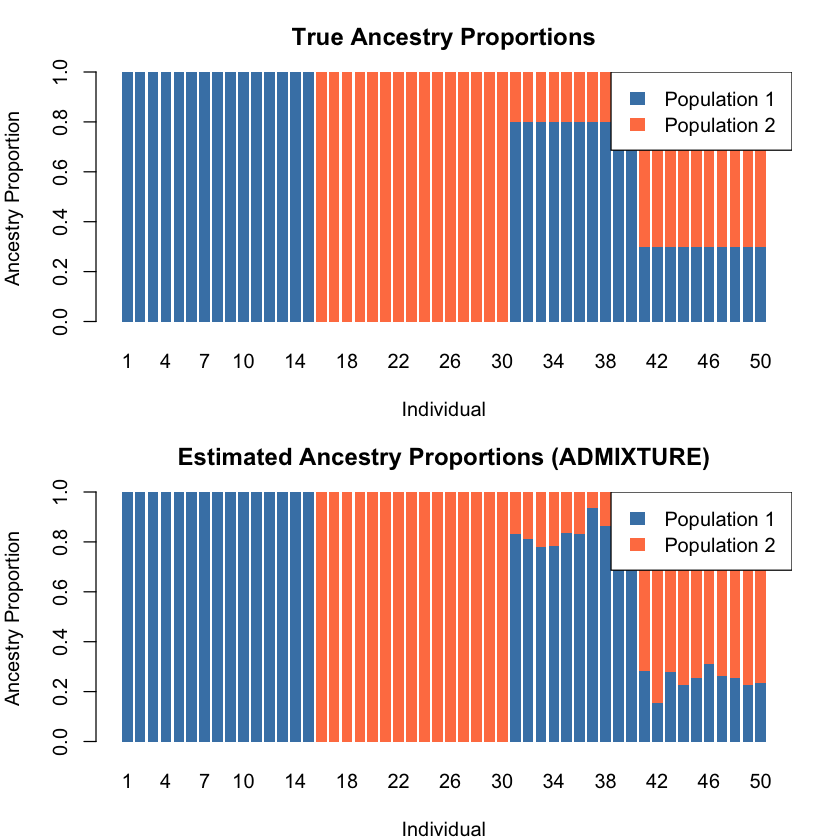

In [9]:
par(mfrow = c(2, 1), mar = c(4, 4, 3, 2))

# True ancestry
barplot(t(transpose_L_true), col = c("steelblue", "coral"), border = NA,
        main = "True Ancestry Proportions",
        xlab = "Individual", ylab = "Ancestry Proportion",
        names.arg = 1:N)
legend("topright", legend = c("Population 1", "Population 2"),
       fill = c("steelblue", "coral"), border = NA)

# Estimated ancestry
barplot(t(transpose_L_estimated), col = c("steelblue", "coral"), border = NA,
        main = "Estimated Ancestry Proportions (ADMIXTURE)",
        xlab = "Individual", ylab = "Ancestry Proportion",
        names.arg = 1:N)
legend("topright", legend = c("Population 1", "Population 2"),
       fill = c("steelblue", "coral"), border = NA)

## Example 2 -- Exploratory Factor Analysis in Gene Expression

Suppose you measure expression levels of five genes across 100 tissue samples. You notice that some genes tend to go up or down together—but why? Could it be because they're controlled by the same underlying biological pathway? In this example, we'll explore how factor analysis helps us uncover those hidden pathways. We'll start by letting the data show us what structure exists (exploratory analysis), and then we'll test a specific theory about which genes belong to which pathways -- showing how this detective work can reveal the invisible biological forces driving patterns in your data. Here we perform non-negative matrix factorization on the observed data to reveal the underlying two pathways.

First, let's create toy data with a known structure where we have two latent biological pathways affecting gene expression.

### Setup

In [11]:
rm(list=ls())
library(NMF)
library(ggplot2)
set.seed(29)

n_samples <- 100   # 100 tissue samples
n_genes <- 5       # 5 genes total

# Two latent factors (biological pathways)
factor1 <- rnorm(n_samples)  # Inflammatory pathway activity
factor2 <- rnorm(n_samples)  # Metabolic pathway activity

# Create gene expression data
# Genes 1-2: belong to Factor 1 (Inflammatory)
# Genes 3-5: belong to Factor 2 (Metabolic)
expression <- matrix(0, nrow = n_samples, ncol = n_genes)

for (i in 1:n_samples) {
  # the exponential function ensures non-negativity in the observed data
  expression[i, 1:2] <- exp(0.8 * factor1[i] + rnorm(2, 0, 0.3))
  expression[i, 3:5] <- exp(0.5 * factor2[i] + rnorm(3, 0, 0.3))
}

# Name the genes
colnames(expression) <- c(paste0("IL", 1:2),      # Inflammatory genes
                          paste0("METAB", 1:3))   # Metabolic genes
rownames(expression) <- paste0("Sample", 1:n_samples)

cat("Data dimensions:", nrow(expression), "samples x", ncol(expression), "genes\n")
cat("\nFirst few rows of expression data:\n")
round(head(expression), 2)

Data dimensions: 100 samples x 5 genes

First few rows of expression data:


,IL1,IL2,METAB1,METAB2,METAB3
Sample1,0.28,0.51,1.16,0.78,0.61
Sample2,0.35,0.35,1.15,1.95,1.00
Sample3,1.64,0.95,0.31,0.42,0.60
Sample4,2.33,3.82,0.44,0.22,0.98
Sample5,0.44,0.41,1.55,2.28,1.44
Sample6,4.68,4.98,2.93,2.16,2.58


### Non-negative Matrix Factorization

Then we perform the non-negative matrix factorization on the observed expression data.

In [12]:
result <- nmf(expression, rank = 2, method = "brunet")

# Extract factors
L_estimated <- basis(result) 
F_estimated <- coef(result)  

### NFM Results

Let's first look at the estimated $\mathbf{F}$:

In [13]:
F_estimated

IL1,IL2,METAB1,METAB2,METAB3
0.02208169,0.03309531,0.30621846,0.30510774,0.30724205
0.43319431,0.42081824,0.03526331,0.02846171,0.05062435


Three genes (METAB1, METAB2, METAB3) contribute to the majority of the first factor (first row in `F_estimated`); while the other two genes contribute to the second factor.

We can also check the correlation between the estimated factor scores and the true factor scores, both are high:

In [14]:
cor(L_estimated[,1], factor2)
cor(L_estimated[,2], factor1)

[1] 0.8615581

[1] 0.8681125

### Reconstruction Based on Estimated $\mathbf{L}$ and $\mathbf{F}$ and Visualization

We can also reconstruct the expression matrix based on the estimated $\mathbf{L}$ and $\mathbf{F}$ and compute the variance explained by the model:

In [15]:
# Reconstructed matrix
expression_hat <- fitted(result)
residual <- expression - expression_hat

ss_total <- sum((expression - mean(expression))^2)
ss_resid <- sum((expression - expression_hat)^2)
R2 <- 1 - ss_resid / ss_total
cat("Proportion of variance explained (R-squared):", round(R2, 4), "\n")

Proportion of variance explained (R-squared): 0.8894 


The reconstructed expression data (based on the estimated $\mathbf{L}$ and $\mathbf{F}$) aligns well with the measured expression data:

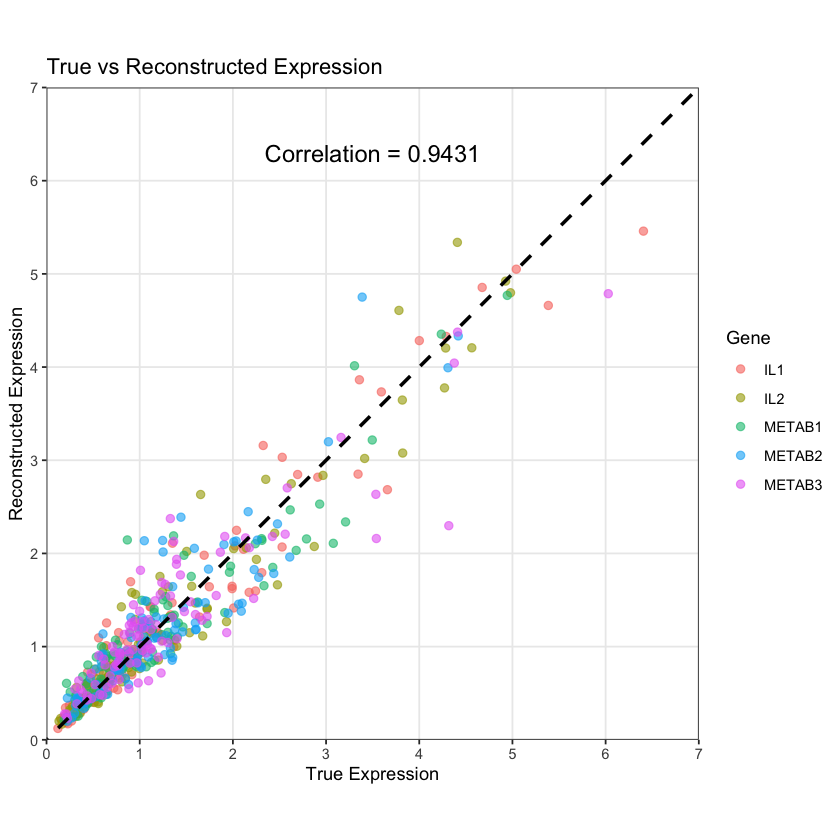

In [16]:
# Create data frame with gene labels
df <- data.frame(
  true = as.vector(expression),
  reconstructed = as.vector(expression_hat),
  gene = rep(colnames(expression), each = n_samples)
)

# Calculate correlation
cor_val <- cor(df$true, df$reconstructed)

# Create plot with colors by gene
ggplot(df, aes(x = true, y = reconstructed, color = gene)) +
  geom_point(alpha = 0.6, size = 2) +
  geom_abline(intercept = 0, slope = 1, color = "black", 
              linetype = "dashed", linewidth = 1) +
  annotate("text", x = 3.5, y = 6.3, 
           label = paste("Correlation =", round(cor_val, 4)), 
           color = "black", size = 5) +
  scale_x_continuous(breaks = 0:7, limits = c(0, 7), expand = c(0, 0)) +
  scale_y_continuous(breaks = 0:7, limits = c(0, 7), expand = c(0, 0)) +
  coord_fixed(ratio = 1) +  # Makes it square
  labs(x = "True Expression", 
       y = "Reconstructed Expression",
       title = "True vs Reconstructed Expression",
       color = "Gene") +
  theme_bw() +
  theme(panel.grid.minor = element_blank())

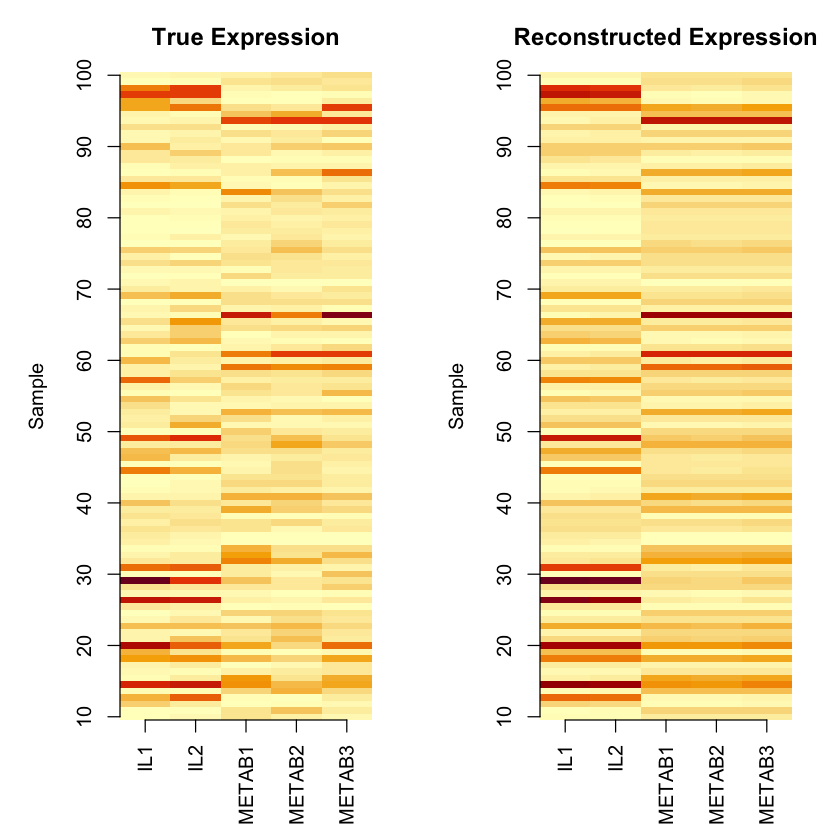

In [17]:
par(mfrow = c(1, 2), mar = c(5, 5, 3, 2))

# True expression heatmap
image(t(expression), 
      main = "True Expression",
      ylab = "Sample",
      col = hcl.colors(50, "YlOrRd", rev = TRUE),
      axes = FALSE)
axis(1, at = seq(0, 1, length.out = n_genes), labels = colnames(expression), las = 2)
axis(2, at = seq(0, 1, length.out = 10), labels = seq(10, 100, by = 10))

# Reconstructed expression heatmap
image(t(expression_hat), 
      main = "Reconstructed Expression",
      ylab = "Sample",
      col = hcl.colors(50, "YlOrRd", rev = TRUE),
      axes = FALSE)
axis(1, at = seq(0, 1, length.out = n_genes), labels = colnames(expression), las = 2)
axis(2, at = seq(0, 1, length.out = 10), labels = seq(10, 100, by = 10))